# XP Exercises - Inferential statistics with regression

As stated in the instructions, please complete the code when you see a "##TODO"


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_1samp


In [4]:
## TODO : load the dataset in a dataframe called d1, that you can find here : https://www.kaggle.com/code/youssefelzahar/inferential-statistics/input?select=air+traffic.csv
d1 = pd.read_csv('air traffic.csv')  # Если файл лежит локально в папке с этим скриптом
print(d1.head())

   Year  Month     Dom_Pax    Int_Pax         Pax  Dom_Flt Int_Flt      Flt  \
0  2003      1  43,032,450  4,905,830  47,938,280  785,160  57,667  842,827   
1  2003      2  41,166,780  4,245,366  45,412,146  690,351  51,259  741,610   
2  2003      3  49,992,700  5,008,613  55,001,313  797,194  58,926  856,120   
3  2003      4  47,033,260  4,345,444  51,378,704  766,260  55,005  821,265   
4  2003      5  49,152,352  4,610,834  53,763,186  789,397  55,265  844,662   

      Dom_RPM     Int_RPM         RPM     Dom_ASM     Int_ASM         ASM  \
0  36,211,422  12,885,980  49,097,402  56,191,300  17,968,572  74,159,872   
1  34,148,439  10,715,468  44,863,907  50,088,434  15,587,880  65,676,314   
2  41,774,564  12,567,068  54,341,633  57,592,901  17,753,174  75,346,075   
3  39,465,980  10,370,592  49,836,572  54,639,679  15,528,761  70,168,440   
4  41,001,934  11,575,026  52,576,960  55,349,897  15,629,821  70,979,718   

   Dom_LF  Int_LF     LF  
0   64.44   71.71  66.20  
1   68.1

# Columns Description

* Dom_Pax : Domestic Air Travel Passengers
* Int_Pax : International Air Travel Passengers
* Pax : Total Air Travel Passengers
* Dom_Flt : Number of Flights (Domestic)
* Int_Flt : Number of Flights (International)
* Flt : Number of Flights (Total)
* Dom_RPM : Revenue Passenger-miles (Domestic)
* Int_RPM : Revenue Passenger-miles (International)


In [5]:
## TODO: Check the summary of the DataFrame to see its structure and data types.
# Посмотреть общую информацию: типы данных, количество ненулевых значений
print(d1.info())

# Быстрая статистика по числовым колонкам
print(d1.describe())

# Проверить названия всех колонок
print(d1.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB
None
              Year       Month      Dom_LF      Int_LF          LF
count   249.000000  249.000000  249.0

In [6]:
print(d1.isnull().sum())

Year       0
Month      0
Dom_Pax    0
Int_Pax    0
Pax        0
Dom_Flt    0
Int_Flt    0
Flt        0
Dom_RPM    0
Int_RPM    0
RPM        0
Dom_ASM    0
Int_ASM    0
ASM        0
Dom_LF     0
Int_LF     0
LF         0
dtype: int64


# Inferential statistics

We will perform the following :

1. Linear Regression

2. Hypothesis testing




# Linear and Multiple Regression

The best linear line describe the correlation between two variables.

We have two types:

1. linear Regression
2. Multiple Regression

The equation of regression

**w=a+(b*x)**

**w=predict variable**(The point of intersection of the x axis and the y axis)

**a=intercept**(The point of intersection of the regression and the y axis)

**b=slope**(The amount of increase in regression relative to the x-axis)

In [27]:
d1['Dom_Flt'] = d1['Dom_Flt'].astype(str).str.replace(',', '')
d1['Dom_Flt'] = pd.to_numeric(d1['Dom_Flt'], errors='coerce')

In [29]:
d1['Dom_Pax'] = d1['Dom_Pax'].astype(str).str.replace(',', '')
d1['Dom_Pax'] = pd.to_numeric(d1['Dom_Pax'], errors='coerce')

In [31]:
print(d1['Dom_Flt'].dtype)
print(d1['Dom_Flt'].head())

print(d1['Dom_Pax'].dtype)
print(d1['Dom_Pax'].head())

float64
0    785160.0
1    690351.0
2    797194.0
3    766260.0
4    789397.0
Name: Dom_Flt, dtype: float64
int64
0    43032450
1    41166780
2    49992700
3    47033260
4    49152352
Name: Dom_Pax, dtype: int64


# Linear Regression

Intercept (a): 402758.7208295016
Slope (b): 0.005506132716515944
P-value: 5.3156895585332156e-20
Standard error: 0.000550385239973366
Predicted flights for 100 domestic passengers: 402759.2714427732


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


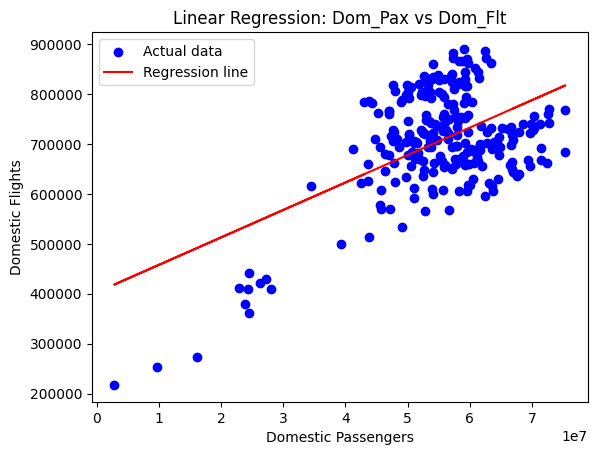

In [32]:
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import matplotlib.pyplot as plt

X = d1[['Dom_Pax']]  # 2D массив для sklearn
y = d1['Dom_Flt']

# 1. Обучение модели
model = LinearRegression()
model.fit(X, y)

# 2. Параметры модели
a = model.intercept_
b = model.coef_[0]

print(f"Intercept (a): {a}")
print(f"Slope (b): {b}")

# 3. Статистические параметры с помощью linregress
slope, intercept, r_value, p_value, std_err = linregress(d1['Dom_Pax'], d1['Dom_Flt'])
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

# 4. Предсказание для 100 пассажиров
pred_100 = model.predict([[100]])
print(f"Predicted flights for 100 domestic passengers: {pred_100[0]}")

# 5. Визуализация
plt.scatter(d1['Dom_Pax'], d1['Dom_Flt'], color='blue', label='Actual data')
plt.plot(d1['Dom_Pax'], model.predict(X), color='red', label='Regression line')
plt.xlabel('Domestic Passengers')
plt.ylabel('Domestic Flights')
plt.legend()
plt.title('Linear Regression: Dom_Pax vs Dom_Flt')
plt.show()


# The coefficient of correlation

The relationship between the values on the x-axis and the y-axis determines whether linear regression can be used for prediction. If there is no relationship, linear regression is not suitable for making predictions.

The correlation coefficient (r) ranges from -1 to 1. A value of 0 indicates no relationship, while values close to 1 or -1 signify a strong positive or negative relationship, respectively, with a perfect correlation at either end.

In [34]:
## TODO: Print the slope, intercept, p-value, standard error, and the predicted value for 100 domestic passengers.
slope, intercept, r_value, p_value, std_err = linregress(d1['Dom_Pax'], d1['Dom_Flt'])
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

P-value: 5.3156895585332156e-20
Standard error: 0.000550385239973366


# Linear Regression


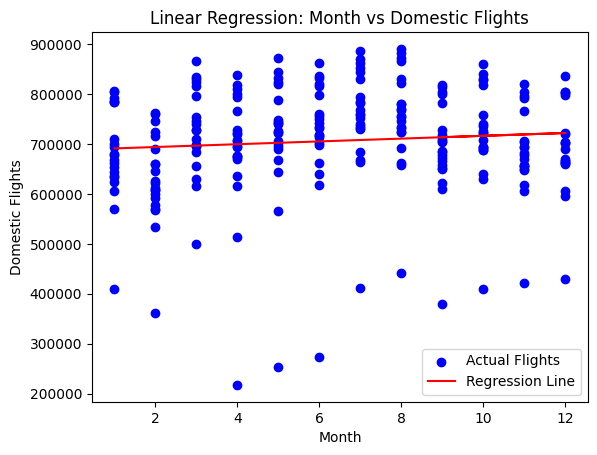

slope = 2808.8043323223224
intercept = 688645.7672555126
r² = 0.008159315862821493
p = 0.15528735163899268
std_err = 1970.457608327985


In [35]:
## TODO: Calculate linear regression parameters
slope, intercept, r_value, p_value, std_err = linregress(d1['Month'], d1['Dom_Flt'])
r2 = r_value ** 2

## TODO:  Define the function for the linear model
def linear_model(x):
    return intercept + slope * x

## TODO:  Apply the model to the 'Month' data
d1['Predicted_Flt'] = linear_model(d1['Month'])

## TODO:  Plot the scatter plot and the regression line
plt.scatter(d1['Month'], d1['Dom_Flt'], color='blue', label='Actual Flights')
plt.plot(d1['Month'], d1['Predicted_Flt'], color='red', label='Regression Line')
plt.xlabel('Month')
plt.ylabel('Domestic Flights')
plt.title('Linear Regression: Month vs Domestic Flights')
plt.legend()
plt.show()
# Results
print(f"slope = {slope}")
print(f"intercept = {intercept}")
print(f"r² = {r2}")
print(f"p = {p_value}")
print(f"std_err = {std_err}")


In [ ]:
## TODO: Print r2

**Now Let's using ScikitLearn (Linear regression) to predict the value of y by using values of x**


In [36]:
## TODO: Prepare the data X and è for regression by reshaping the features using .reshape(-1,1)
X = d1['Month'].values.reshape(-1, 1)  # 2D
y = d1['Dom_Flt'].values  # 1D

In [37]:
## TODO: Split the data into training and validation sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
## TODO: Fit the linear regression model, make a prediction, and evaluate the model.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
## TODO: Print the prediction for the given input.
new_month = np.array([[7]])
predicted_flights = model.predict(new_month)
print(f"Predicted Domestic Flights for Month 7: {predicted_flights[0]}")

Predicted Domestic Flights for Month 7: 701636.4496532803


The Mean Squared Error (MSE) measures how well a regression line fits a set of data points by calculating the average of the squared differences between the observed values and the predicted values.

The formula for MSE is:

MSE=(1/n)*sum(yi-yhati)^2

yi=observed values

yhat=predict value

MSE quantifies the error between the observed and predicted values, with smaller values indicating better model accuracy.

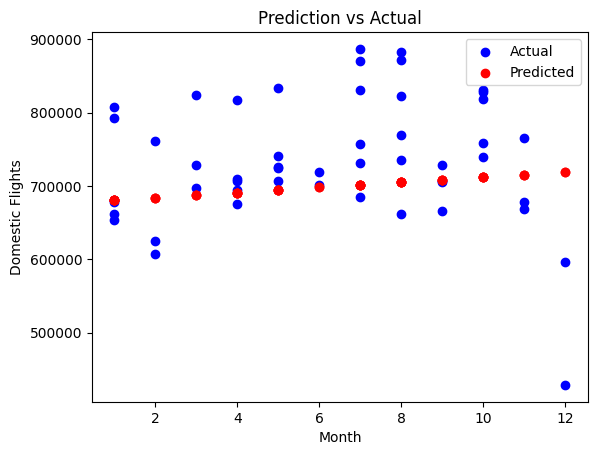

In [42]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Month')
plt.ylabel('Domestic Flights')
plt.title('Prediction vs Actual')
plt.legend()
plt.show()


In [45]:
## TODO: Calculate the mean squared error (MSE) for the training set.
# Предсказания
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# MSE
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

print(f"Mean Squared Error (Train): {mse_train}")
print(f"Mean Squared Error (Test): {mse_test}")


Mean Squared Error (Train): 12123023766.197514
Mean Squared Error (Test): 8412063049.294945


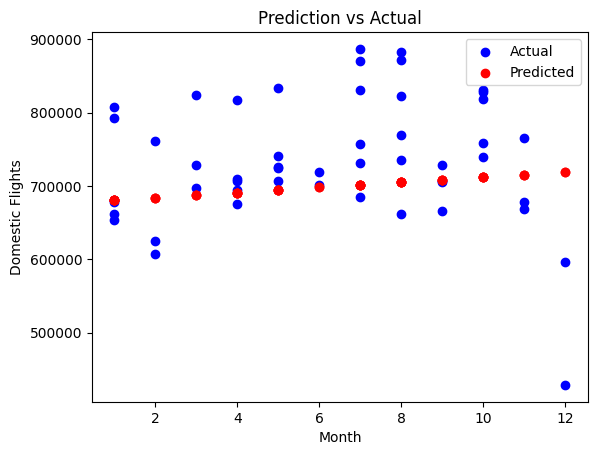

In [48]:
# Рассчет предсказаний для теста и визуализация
y_pred_test = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_test, color='red', label='Predicted')
plt.xlabel('Month')
plt.ylabel('Domestic Flights')
plt.title('Prediction vs Actual')
plt.legend()
plt.show()


In [49]:
# Предсказания на тесте
y_pred_test = model.predict(X_test)

# Выведем первые 10 значений месяца, реальных и предсказанных рейсов
print("Month | Actual Flights | Predicted Flights")
for i in range(10):
    print(f"{int(X_test[i][0]):5d} | {int(y_test[i]):14d} | {int(y_pred_test[i]):16d}")

Month | Actual Flights | Predicted Flights
    6 |         701992 |           698101
    7 |         831619 |           701636
    2 |         625530 |           683963
    1 |         793275 |           680429
    5 |         725712 |           694567
    1 |         653344 |           680429
    5 |         740482 |           694567
    4 |         695306 |           691032
   10 |         818308 |           712240
    9 |         706395 |           708705


What do you think ?

The linear regression model on the Month feature works, but it is not perfect - it roughly estimates the number of flights.

# Multiple Regression

Multiple regression is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. This allows us to understand how multiple predictors influence a single outcome.

The general formula for multiple regression is:

y=β0+β1x1+β2x2+⋯+βpxp+ϵ


Where:

* y is the dependent (or response) variable,
* x1​,x2​,…,xp​ are the independent (predictor) variables,
* β0​ is the intercept,
* pβ1​,β2​,…,βp​ are the regression coefficients for each independent variable,
* ϵ is the error term.

the goal is to estimate the coefficients (β) that minimize the error between the predicted and actual values of the dependent variable.

In [50]:
## TODO: Reshape the features mx and target variables my .
# Выбираем несколько признаков для множественной регрессии
mx = d1[['Month', 'Dom_Pax', 'Int_Pax']]  # несколько признаков
my = d1['Dom_Flt']  # целевая переменная

# Обработка возможных пропусков (если есть)
mx = mx.dropna()
my = my[mx.index]  # синхронизируем по индексам


In [51]:
## TODO: Split the features and target variables into training and validation sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mx, my, test_size=0.2, random_state=42)


In [54]:
# Пример для всего DataFrame X_train
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].str.replace(',', '').astype(float)

# Аналогично для y_train, если там строки с запятыми:
if y_train.dtype == 'object':
    y_train = y_train.str.replace(',', '').astype(float)

print(X_train.dtypes)


Month        int64
Dom_Pax      int64
Int_Pax    float64
dtype: object


In [55]:
print(y_train.dtype)
print(y_train.head())

float64
132    624812.0
156    636761.0
213    410189.0
119    670793.0
139    723997.0
Name: Dom_Flt, dtype: float64


In [56]:
## TODO: Fit the multiple regression model and calculate the R^2 score on the training data using .score
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

r2_train = model_multi.score(X_train, y_train)
print(f"R² score on training data: {r2_train:.4f}")


R² score on training data: 0.3553


In [57]:
## TODO: Print the target values
print("Actual target values (first 10 test samples):")
print(y_test.head(10))

Actual target values (first 10 test samples):
137    701992.0
6      831619.0
97     625530.0
60     793275.0
112    725712.0
180    653344.0
196    740482.0
183    695306.0
9      818308.0
104    706395.0
Name: Dom_Flt, dtype: float64


In [59]:
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = X_test[col].str.replace(',', '').astype(float)

In [60]:
## TODO: Make a prediction using the multiple regression model.
y_pred_multi = model_multi.predict(X_test)

print("Predicted values (first 10 test samples):")
print(y_pred_multi[:10])


Predicted values (first 10 test samples):
[706473.84475397 732264.54758697 620187.39055721 663046.59547925
 702665.03540335 689336.59870256 806249.09711139 760617.92419415
 700229.10132239 671926.1957227 ]


# Hypothesis testing

Hypothesis testing is a systematic procedure used to evaluate whether the results of a research study support a particular theory or assumption about a population. It helps determine if there is enough evidence to reject or fail to reject a hypothesis based on sample data.

**we have two types**

1. The null hypothesis H0, represents the idea that there is no effect, relationship, or difference in the population. It serves as the baseline assumption that any observed effect in the data is due to chance.

Example: "There is no significant difference in test scores between two groups."

2. The alternative hypothesis Ha suggests that there is an effect, relationship, or difference in the population. It is what researchers typically aim to support with their data.

Example: "There is a significant difference in test scores between two groups."

In hypothesis testing, we aim to gather enough evidence from the sample to either reject the null hypothesis (H0H0​) in favor of the alternative hypothesis (HaHa​), or fail to reject the null hypothesis, indicating that there isn't sufficient evidence for the alternative hypothesis.


# Null hypothesis

The null hypothesis (H0H0​) is a statement that there is no significant difference or effect in the population. It assumes that any observed differences in the sample are due to random chance.

In hypothesis testing, the decision to reject or fail to reject the null hypothesis is based on the p-value.

If :
* p ≤ 0.05: Reject H0H0​ (evidence supports HaHa​).
* p > 0.05: Fail to reject H0H0​ (no evidence to support HaHa​).

# Alternative hypothesis Ha

The alternative hypothesis (HaHa​) is a statement in statistical hypothesis testing that suggests there is a significant difference, effect, or relationship in the population, contrary to the null hypothesis (H0H0​).

In other words, HaHa​ proposes that the observed data is not due to random chance, and there is some true effect or difference in the population that can be detected.

For example:

- Null Hypothesis (H0​): There is no significant difference in test scores between two groups.
- Alternative Hypothesis (Ha​): There is a significant difference in test scores between the two groups.

The goal of hypothesis testing is to gather enough evidence to reject the null hypothesis in favor of the alternative hypothesis, suggesting that the observed effect or difference is statistically significant.

In [61]:
## (Optional) TODO: Perform hypothesis testing for two variables of your choice
from scipy.stats import ttest_1samp

# Берём столбец Dom_Flt (уже приведённый к числовому виду)
data = d1['Dom_Flt'].dropna()

# Проверяем гипотезу: среднее Dom_Flt равно 700000
popmean = 700000

t_stat, p_value = ttest_1samp(data, popmean)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value <= 0.05:
    print("Отвергаем H0: среднее отличается от 700000")
else:
    print("Не отвергаем H0: недостаточно доказательств, что среднее отличается от 700000")


T-statistic: 0.9950
P-value: 0.3207
Не отвергаем H0: недостаточно доказательств, что среднее отличается от 700000


# One sample test

is used to compare the diffrence between sample and population mean

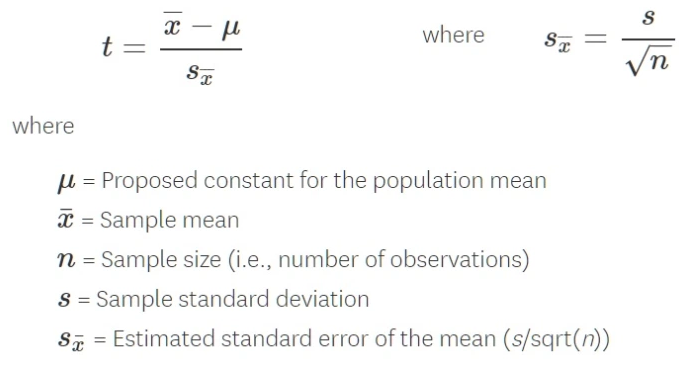

In [62]:
## TODO: Calculate the population mean of the "Year" column.
popmean = d1['Year'].mean()
print(f"Population mean of Year: {popmean}")


Population mean of Year: 2012.879518072289


In [63]:
# let's take sample from data

sample=np.random.choice(d1["Year"],50)
import numpy as np

sample = np.random.choice(d1['Year'].dropna(), 50, replace=False)
print(f"Sample:\n{sample}")
print(f"Sample mean: {sample.mean()}")


Sample:
[2019 2007 2021 2017 2016 2017 2009 2011 2015 2018 2012 2004 2018 2020
 2017 2009 2004 2020 2003 2003 2012 2015 2005 2010 2023 2016 2007 2013
 2014 2012 2016 2017 2011 2018 2003 2010 2007 2022 2006 2012 2013 2014
 2021 2018 2020 2013 2005 2013 2015 2022]
Sample mean: 2013.26


In [ ]:
sample

In [66]:
## Perform a one-sample t-test to compare the sample mean with the population mean.
from scipy.stats import ttest_1samp

ttest_stat, p_value = ttest_1samp(sample, popmean)
print(f"T-statistic: {ttest_stat}")
print(f"P-value: {p_value}")



T-statistic: 0.4732510503279828
P-value: 0.638135666176534


In [ ]:
ttest

In [67]:
sample.mean()

np.float64(2013.26)

In [68]:
## TODO: Perform hypothesis testing based on the p-value.
alpha = 0.05  # уровень значимости

if p_value <= alpha:
    print("Отвергаем нулевую гипотезу: среднее выборки статистически отличается от среднего популяции")
else:
    print("Не отвергаем нулевую гипотезу: недостаточно доказательств, что среднее выборки отличается от среднего популяции")

Не отвергаем нулевую гипотезу: недостаточно доказательств, что среднее выборки отличается от среднего популяции


# Two sample test

it is a statistical test used to compare the means of two independent groups to determine if there is a statistically significant difference between them. It is commonly employed when researchers want to assess whether the mean values of a particular variable differ between two distinct groups.

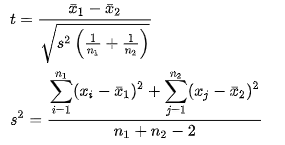

In [89]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

In [90]:
d1['Flt'] = d1['Flt'].astype(str).str.replace(',', '')
d1['Flt'] = pd.to_numeric(d1['Flt'], errors='coerce')

d1['Dom_Pax'] = d1['Dom_Pax'].astype(str).str.replace(',', '')
d1['Dom_Pax'] = pd.to_numeric(d1['Dom_Pax'], errors='coerce')


In [91]:
flt_clean = d1['Flt'].dropna()
dom_pax_clean = d1['Dom_Pax'].dropna()


In [92]:
sample_a = np.random.choice(flt_clean, 50, replace=False)
sample_b = np.random.choice(dom_pax_clean, 50, replace=False)


In [93]:
print("NaN in sample_a:", np.isnan(sample_a).sum())
print("NaN in sample_b:", np.isnan(sample_b).sum())
print(f"Variance sample_a: {np.var(sample_a)}")
print(f"Variance sample_b: {np.var(sample_b)}")

NaN in sample_a: 0
NaN in sample_b: 0
Variance sample_a: 9366082243.010002
Variance sample_b: 68845706684542.61


In [94]:
t_stat, p_value = ttest_ind(sample_a, sample_b, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -44.733583917934595
P-value: 2.1036798337260724e-41


In [95]:
if p_value <= 0.05:
    print("Rejected null hypothesis: средние двух выборок статистически отличаются")
else:
    print("Accepted null hypothesis: недостаточно доказательств о разнице между средними")


Rejected null hypothesis: средние двух выборок статистически отличаются


# Type| & Type ||

Reject the null hypothesis when it’s actually true (Type I error)

Reject the null hypothesis when it’s actually false (Correct)

Fail to reject the null hypothesis when it’s actually true (Correct)

Fail to reject the null hypothesis when it’s actually false (Type II error)

![](https://miro.medium.com/v2/resize:fit:828/format:webp/0*JM4fxEI__jX5f4Oy)

In [96]:
print(f"Variance sample_a: {np.var(sample_a)}")
print(f"Variance sample_b: {np.var(sample_b)}")


Variance sample_a: 9366082243.010002
Variance sample_b: 68845706684542.61


In [97]:
diff_mean = abs(np.mean(sample_a) - np.mean(sample_b))
print(f"Mean difference: {diff_mean}")


Mean difference: 53027801.839999996


In [98]:
from statsmodels.stats.power import TTestIndPower

effect_size = diff_mean / np.sqrt((np.var(sample_a) + np.var(sample_b)) / 2)

analysis = TTestIndPower()
power = analysis.power(effect_size=effect_size,
                       nobs1=50,
                       alpha=0.05,
                       ratio=1.0,
                       alternative='two-sided')
print(f"Estimated power: {power:.3f}")


Estimated power: 1.000


Type I error: ≤ 5% (α)

Type II error: ~0% (power = 1)

This means that the test is reliable and powerful enough.